In [35]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate


In [36]:
SW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#17 SW1.csv.csv")
SW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#18 SW2.csv.csv")
SW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#19 SW3.csv.csv")
SW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#20 SW4.csv.csv")
SW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#21 SW5.csv.csv")

In [37]:
#Loading the corresponding force data
force_SW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#17 SW1.log" , delimiter = "\t")
force_SW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#18 SW2.log" , delimiter = "\t")
force_SW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#19 SW3.log" , delimiter = "\t")
force_SW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#20 SW4.log" , delimiter = "\t")
force_SW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#21 SW5.log" , delimiter = "\t")

In [38]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_SW1 = force_SW1["Time"]
x_force_SW2 = force_SW2["Time"]
x_force_SW3 = force_SW3["Time"]
x_force_SW4 = force_SW4["Time"]
x_force_SW5 = force_SW5["Time"]

#force
Load_SW1 = force_SW1["Load"]
Load_SW2 = force_SW2["Load"]
Load_SW3 = force_SW3["Load"]
Load_SW4 = force_SW4["Load"]
Load_SW5 = force_SW5["Load"]

#plt.plot(x_force_NE1,Load_NE1,color = 'green', label = 'force data NE1 test #2' )
#plt.plot(x_force_NE2,Load_NE2,color = 'blue', label = 'force data NE2 test #2' )
# plt.plot(x_force_NE3,Load_NE3,color = 'yellow', label = 'force data NE3 test #2' )
# plt.plot(x_force_NE4,Load_NE4,color = 'red', label = 'force data NE4 test #2' )
# plt.plot(x_force_NE5,Load_NE5,color = 'brown', label = 'force data NE5 test #2' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for SW1


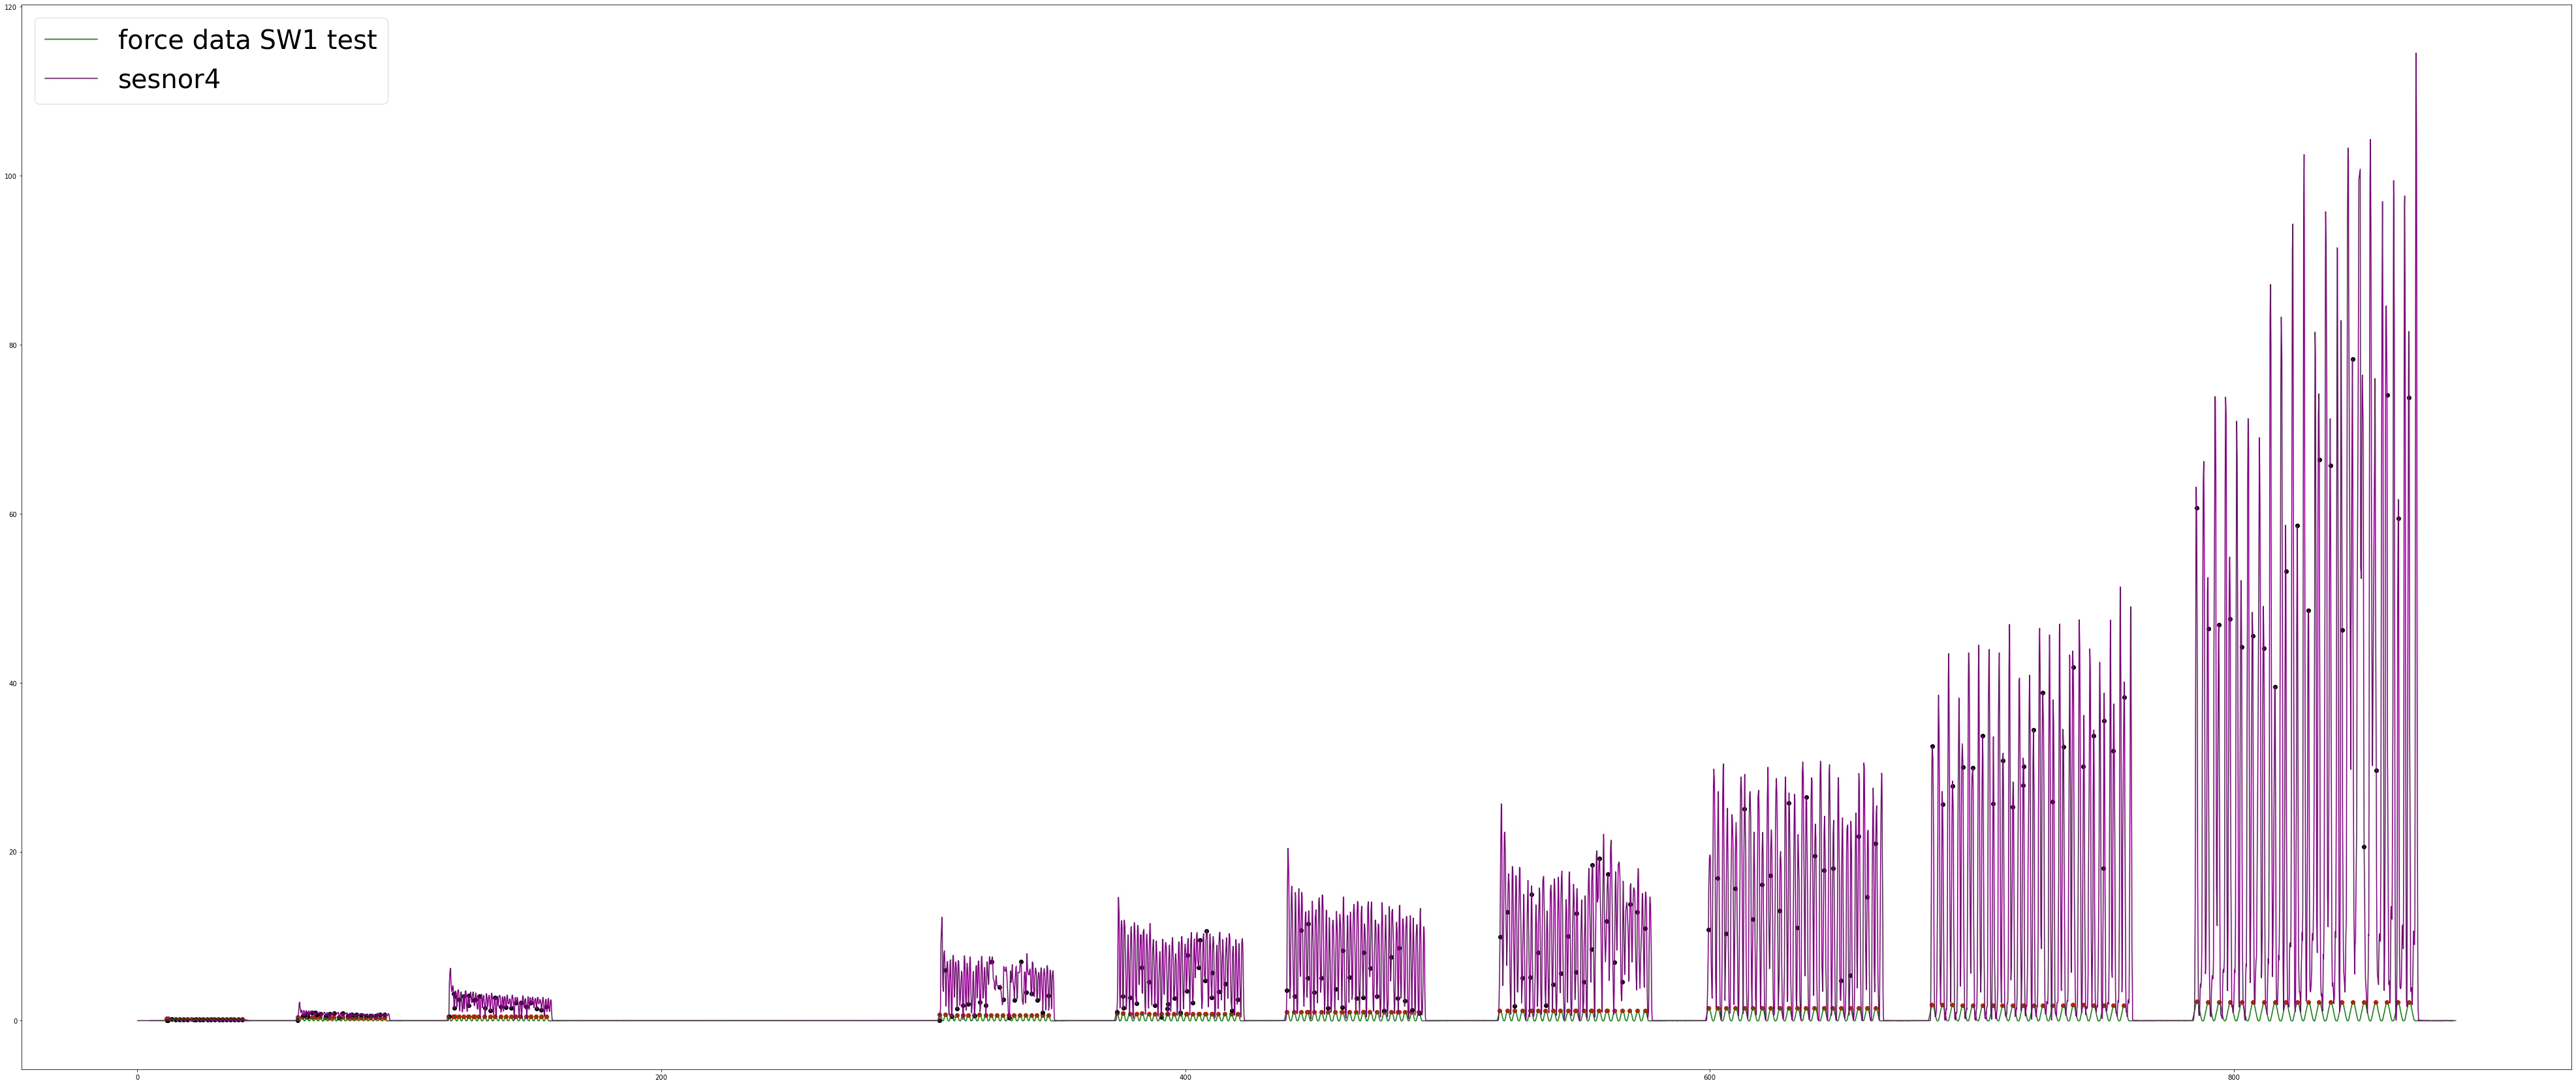

In [39]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SW1

plt.figure(figsize=(70, 30))

# plt.plot(SW1["Unnamed: 0"],SW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SW1["Unnamed: 0"],SW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SW1["Unnamed: 0"],SW1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SW1["Unnamed: 0"],SW1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SW1 = x_force_SW1 + 5
scaled_SW1 = SW1["Unnamed: 0"]

plt.plot(scaled_x_force_SW1,Load_SW1,color = 'green', label = 'force data SW1 test' )
plt.plot(scaled_SW1,SW1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SW1")

#finding the peaks
import bisect
pidx_Load_SW1, _ = find_peaks(Load_SW1,prominence= 0.22 )
peaks_Load_SW1 = Load_SW1[pidx_Load_SW1]
peaks_Ltime_SW1 = scaled_x_force_SW1[pidx_Load_SW1]

plt.scatter(peaks_Ltime_SW1,peaks_Load_SW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SW1time = []

peaks_Ltime_SW1.reset_index(drop = True, inplace = True)
peaks_Load_SW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SW1)):
    idx_SW1time.append(bisect.bisect_left(SW1["Unnamed: 0"], peaks_Ltime_SW1[i]))

plt.scatter(SW1["Unnamed: 0"][idx_SW1time],SW1["s4_d"][idx_SW1time],color = 'black')

In [40]:
#Storing the peaks into csv file - SW1
Load_SW1peaks =[]

for i in range(len(peaks_Load_SW1)):
    Load_SW1peaks.append(peaks_Load_SW1[i])
    
content_SW1 = {'R1':SW1["s1_d"][idx_SW1time],
              'R2':SW1["s2_d"][idx_SW1time],
              'R3':SW1["s3_d"][idx_SW1time],
              'R4':SW1["s4_d"][idx_SW1time], 
              'Load': Load_SW1peaks} 

df_SW1 = pd.DataFrame(content_SW1, columns = ['R1','R2','R3','R4','Load'])

df_SW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SW1.csv',index = False, header = True)

Sensor ? is more profound for SW2


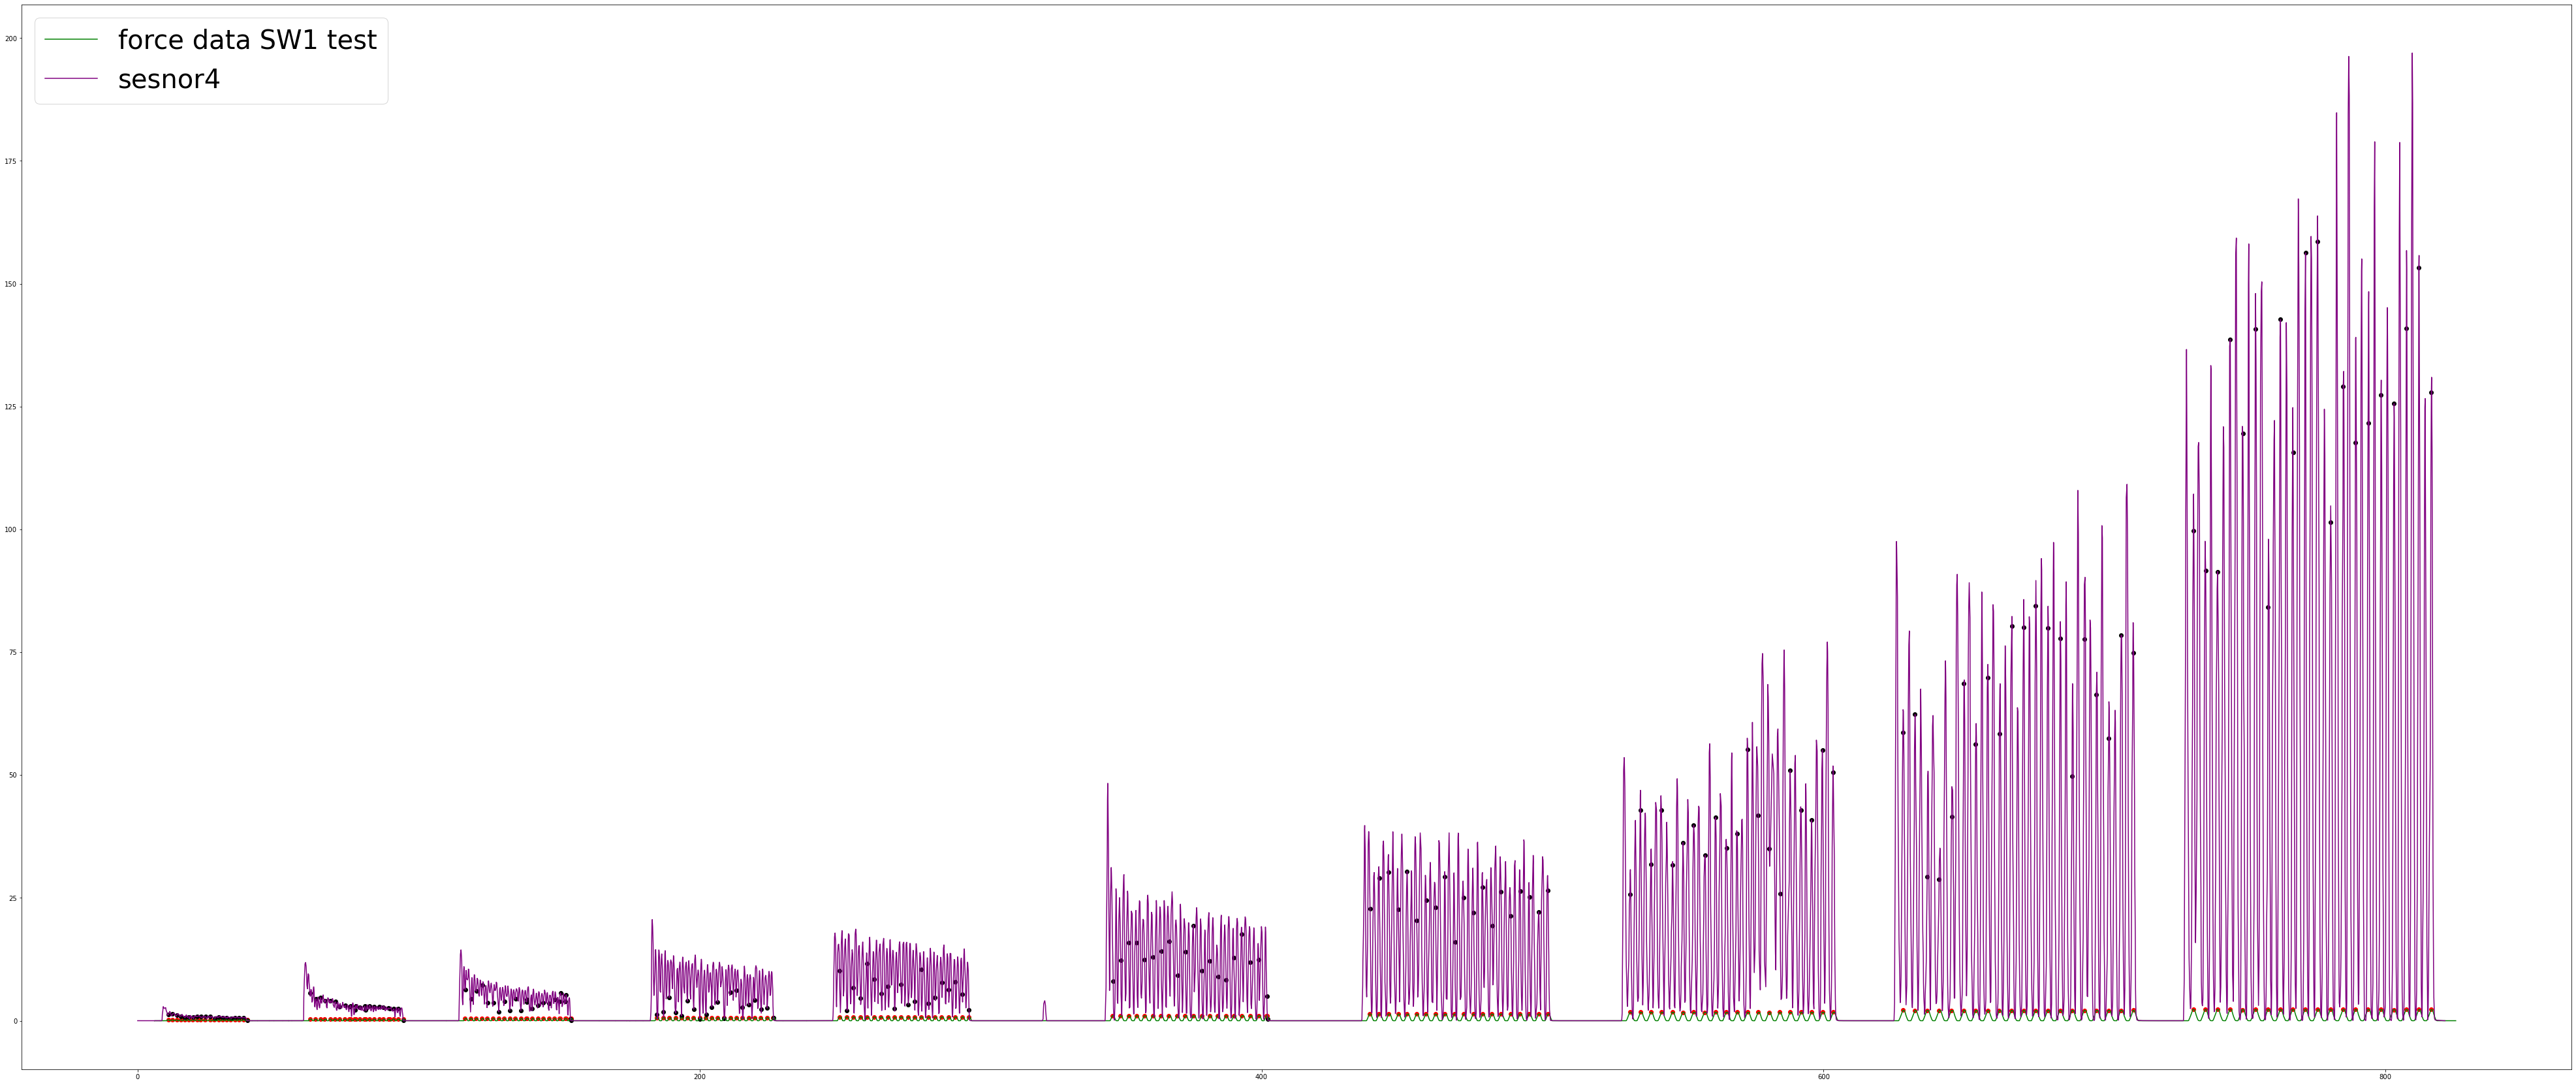

In [41]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SW2

plt.figure(figsize=(70, 30))

# plt.plot(SW2["Unnamed: 0"],SW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SW2["Unnamed: 0"],SW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SW2["Unnamed: 0"],SW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SW2["Unnamed: 0"],SW2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SW2 = x_force_SW2 + 6
scaled_SW2 = SW2 ["Unnamed: 0"]

plt.plot(scaled_x_force_SW2,Load_SW2,color = 'green', label = 'force data SW1 test' )
plt.plot(scaled_SW2,SW2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor ? is more profound for SW2")

#finding the peaks

pidx_Load_SW2, _ = find_peaks(Load_SW2,prominence= 0.1 )
peaks_Load_SW2 = Load_SW2[pidx_Load_SW2]
peaks_Ltime_SW2 = scaled_x_force_SW2[pidx_Load_SW2]

plt.scatter(peaks_Ltime_SW2,peaks_Load_SW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SW2time = []

peaks_Ltime_SW2.reset_index(drop = True, inplace = True)
peaks_Load_SW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SW2)):
    idx_SW2time.append(bisect.bisect_left(SW2["Unnamed: 0"], peaks_Ltime_SW2[i]))

plt.scatter(SW2["Unnamed: 0"][idx_SW2time],SW2["s4_d"][idx_SW2time],color = 'black')

In [42]:
#Storing the peaks into csv file - SW2
Load_SW2peaks =[]

for i in range(len(peaks_Load_SW2)):
    Load_SW2peaks.append(peaks_Load_SW2[i])
    
content_SW2 = {'R1':SW2["s1_d"][idx_SW2time],
              'R2':SW2["s2_d"][idx_SW2time],
              'R3':SW2["s3_d"][idx_SW2time],
              'R4':SW2["s4_d"][idx_SW2time], 
              'Load': Load_SW2peaks} 

df_SW2 = pd.DataFrame(content_SW2, columns = ['R1','R2','R3','R4','Load'])

df_SW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SW2.csv',index = False, header = True)

Sensor 4 is more profound for SW3


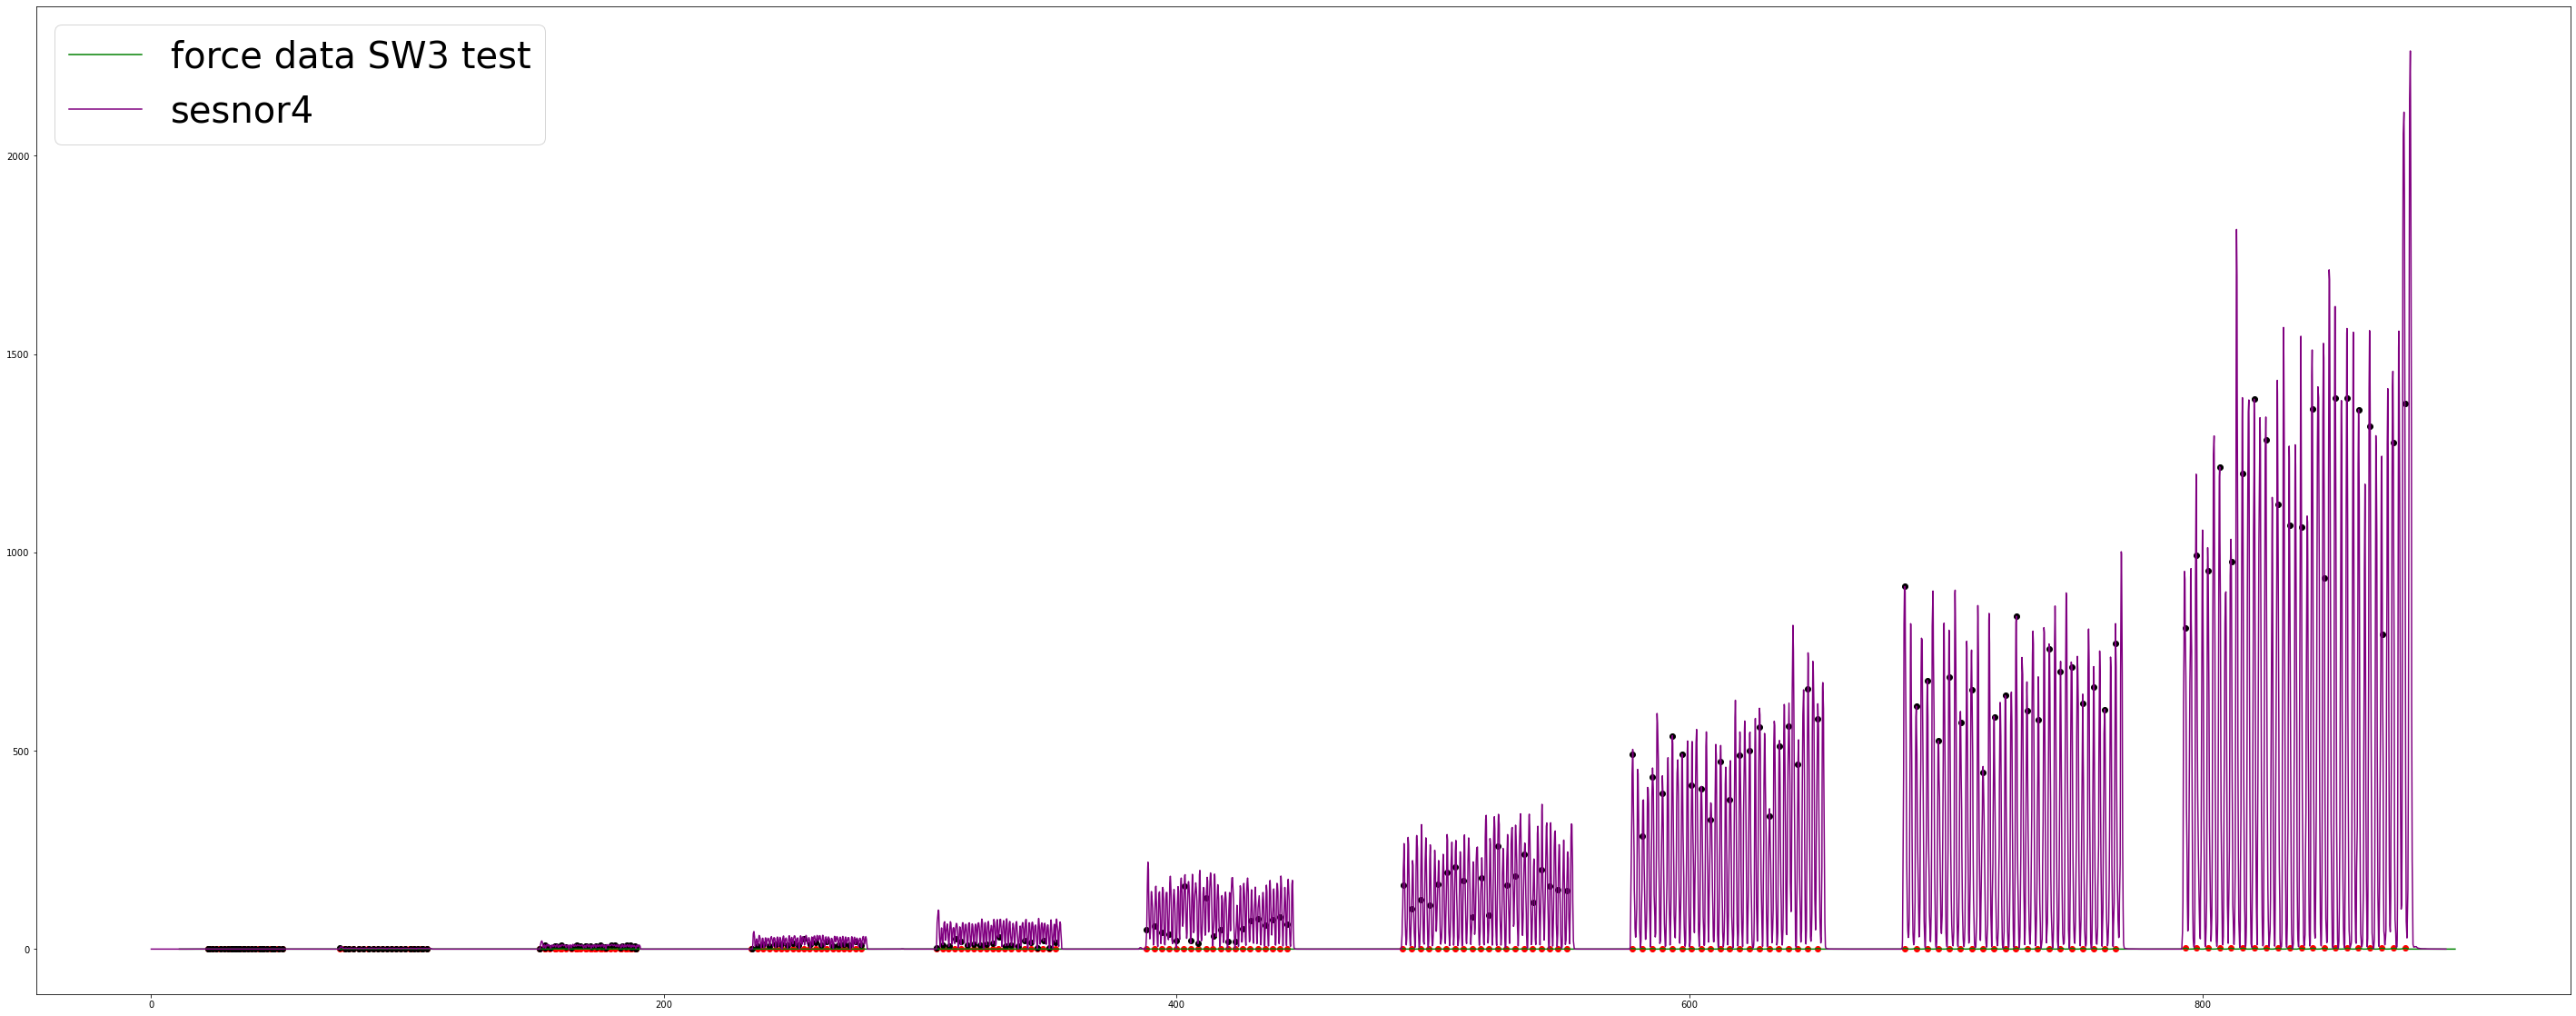

In [43]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SW3

plt.figure(figsize=(50, 20))

# plt.plot(SW3["Unnamed: 0"],SW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SW3["Unnamed: 0"],SW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SW3["Unnamed: 0"],SW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SW3["Unnamed: 0"],SW3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SW3 = x_force_SW3 + 11
scaled_SW3 = SW3["Unnamed: 0"]

plt.plot(scaled_x_force_SW3,Load_SW3,color = 'green', label = 'force data SW3 test' )
plt.plot(scaled_SW3,SW3["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SW3")

#finding the peaks

pidx_Load_SW3, _ = find_peaks(Load_SW3,prominence= 0.1 )
peaks_Load_SW3 = Load_SW3[pidx_Load_SW3]
peaks_Ltime_SW3 = scaled_x_force_SW3[pidx_Load_SW3]

plt.scatter(peaks_Ltime_SW3,peaks_Load_SW3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SW3time = []

peaks_Ltime_SW3.reset_index(drop = True, inplace = True)
peaks_Load_SW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SW3)):
    idx_SW3time.append(bisect.bisect_left(SW3["Unnamed: 0"], peaks_Ltime_SW3[i]))

plt.scatter(SW3["Unnamed: 0"][idx_SW3time],SW3["s4_d"][idx_SW3time],color = 'black')

In [44]:
#Storing the peaks into csv file - SW3
Load_SW3peaks =[]

for i in range(len(peaks_Load_SW3)):
    Load_SW3peaks.append(peaks_Load_SW3[i])
    
content_SW3 = {'R1':SW3["s1_d"][idx_SW3time],
              'R2':SW3["s2_d"][idx_SW3time],
              'R3':SW3["s3_d"][idx_SW3time],
              'R4':SW3["s4_d"][idx_SW3time], 
              'Load': Load_SW3peaks} 

df_SW3 = pd.DataFrame(content_SW3, columns = ['R1','R2','R3','R4','Load'])

df_SW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SW3.csv',index = False, header = True)

Sensor 4 is more profound for SW4


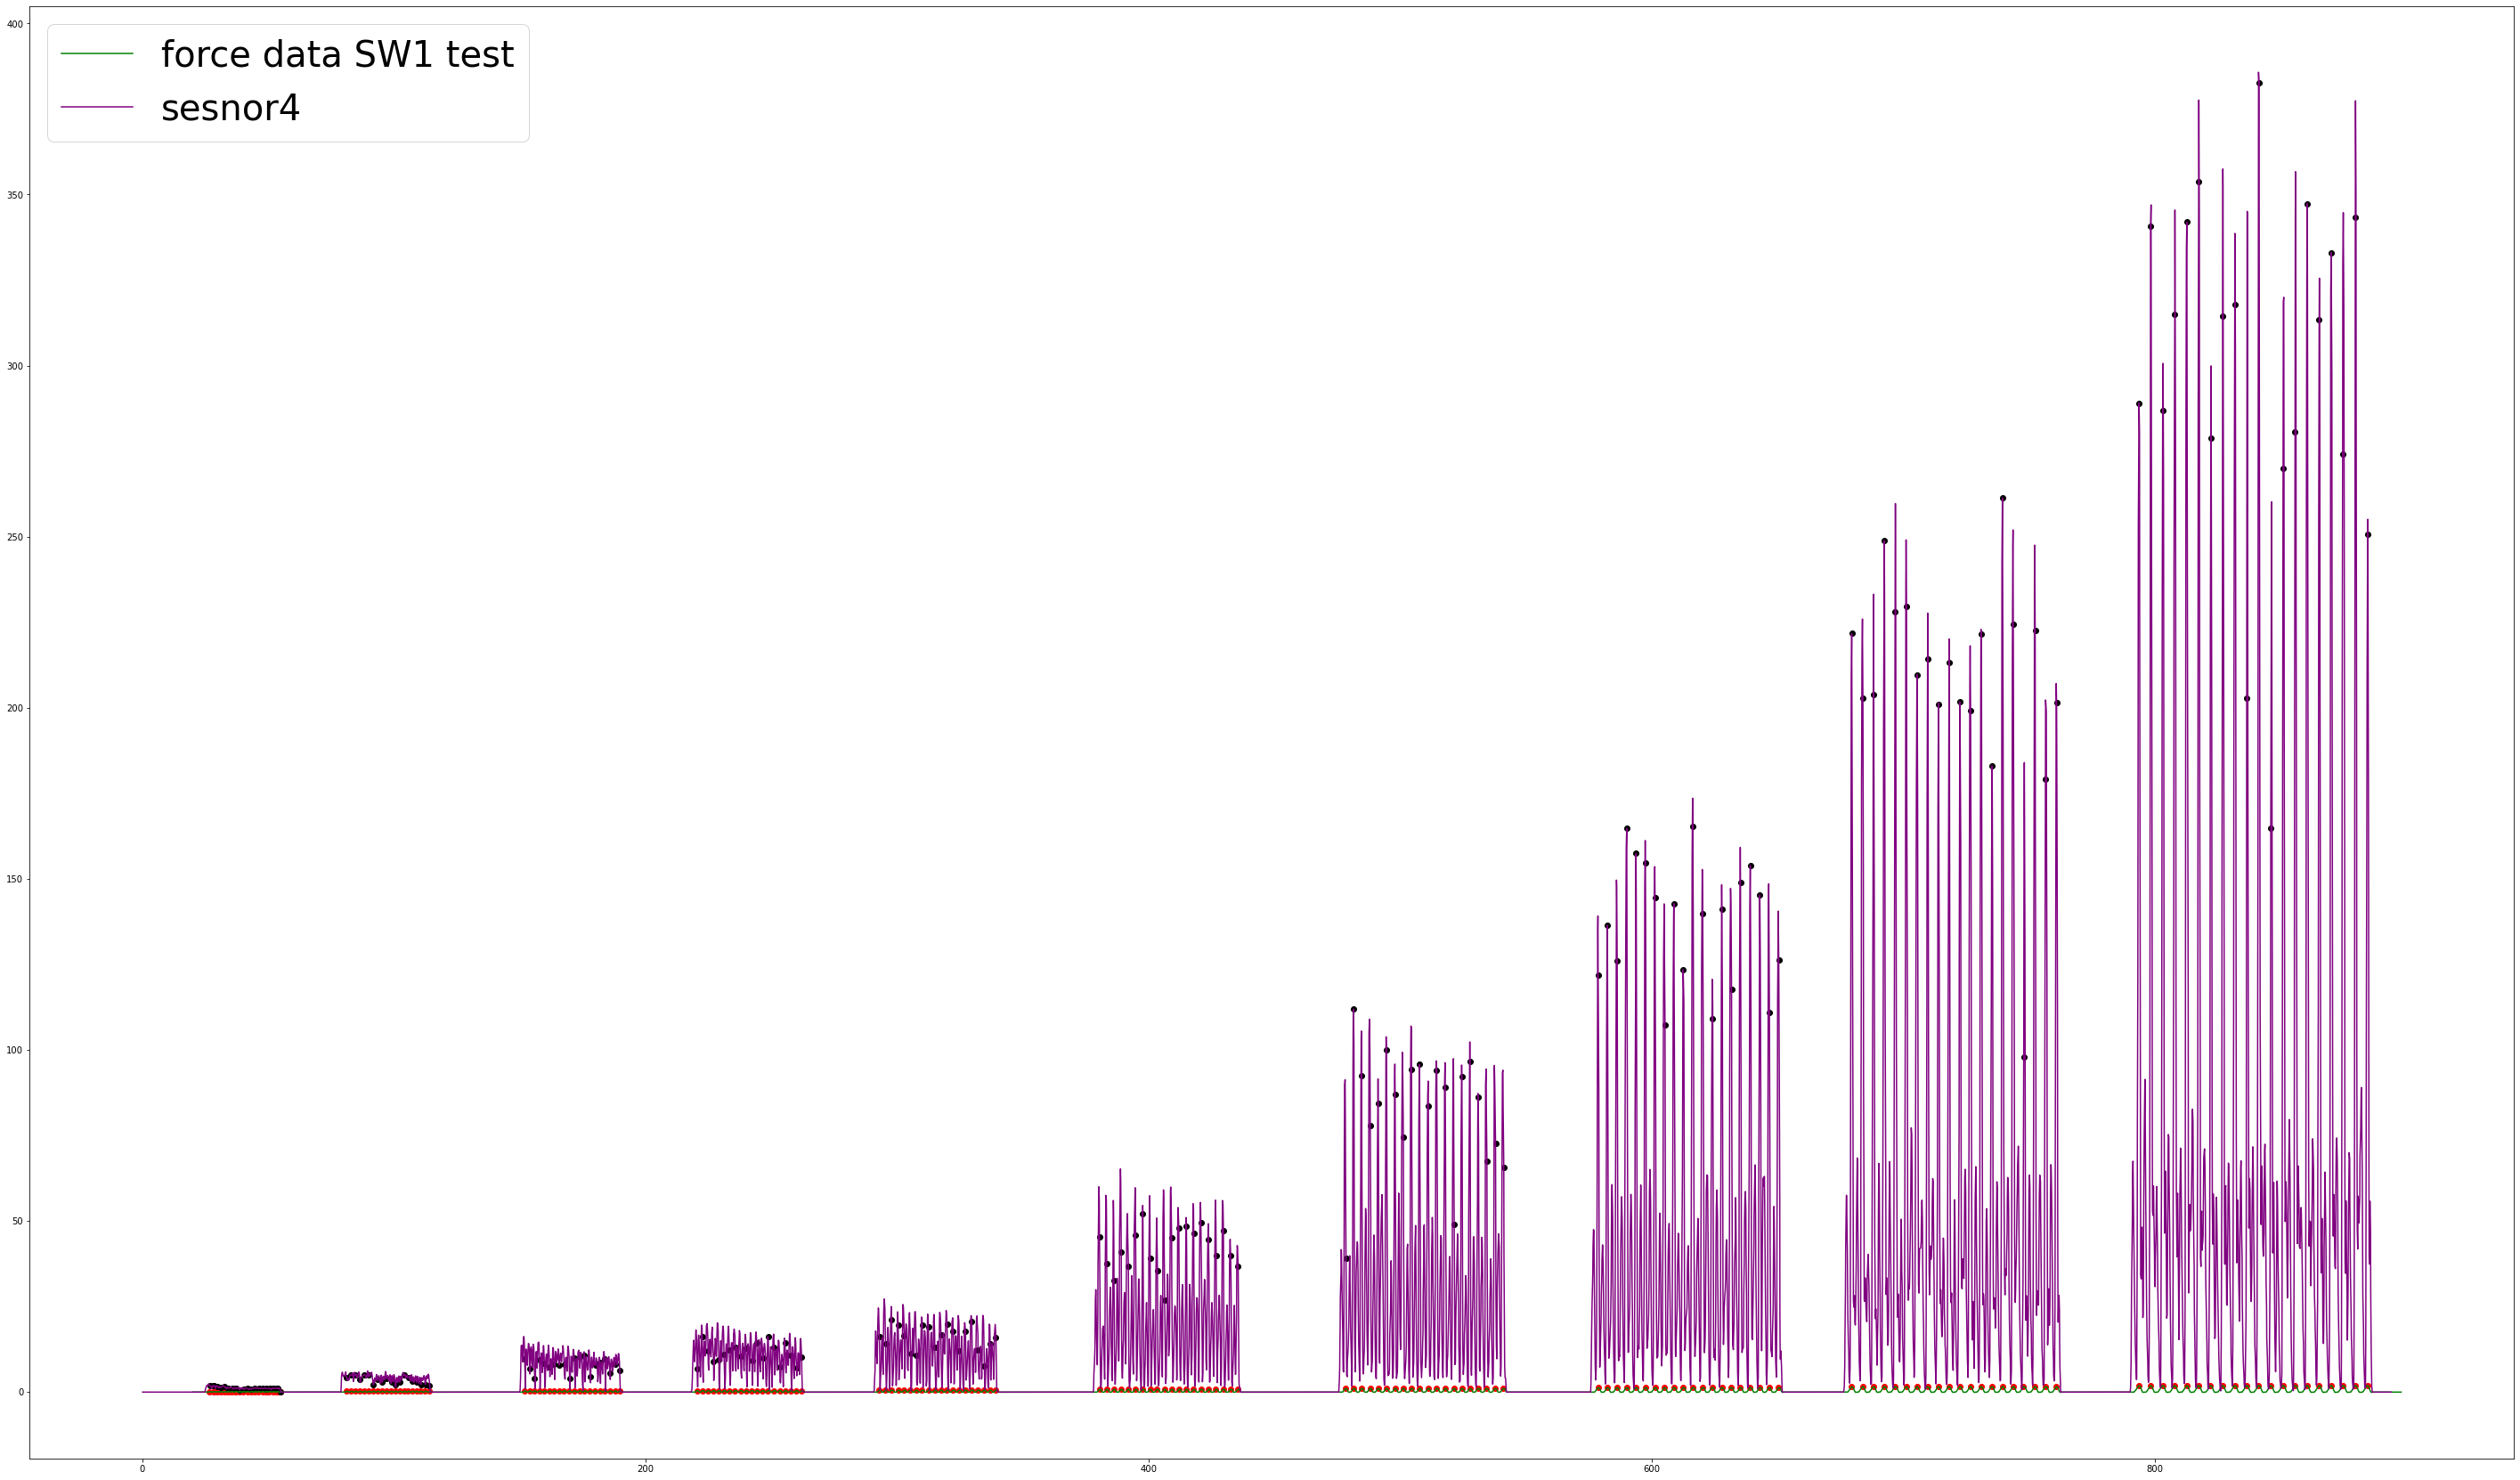

In [45]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SW4

plt.figure(figsize=(50, 30))

# plt.plot(SW4["Unnamed: 0"],SW4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SW4["Unnamed: 0"],SW4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SW4["Unnamed: 0"],SW4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SW4["Unnamed: 0"],SW4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SW4 = x_force_SW4 + 20
scaled_SW4 = SW4["Unnamed: 0"]

plt.plot(scaled_x_force_SW4,Load_SW4,color = 'green', label = 'force data SW1 test' )
plt.plot(scaled_SW4,SW4["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SW4")

#finding the peaks

pidx_Load_SW4, _ = find_peaks(Load_SW4,prominence= 0.1 )
peaks_Load_SW4 = Load_SW4[pidx_Load_SW4]
peaks_Ltime_SW4 = scaled_x_force_SW4[pidx_Load_SW4]

plt.scatter(peaks_Ltime_SW4,peaks_Load_SW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SW4time = []

peaks_Ltime_SW4.reset_index(drop = True, inplace = True)
peaks_Load_SW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SW4)):
    idx_SW4time.append(bisect.bisect_left(SW4["Unnamed: 0"], peaks_Ltime_SW4[i]))

plt.scatter(SW4["Unnamed: 0"][idx_SW4time],SW4["s4_d"][idx_SW4time],color = 'black')

In [46]:
#Storing the peaks into csv file - SW4
Load_SW4peaks =[]

for i in range(len(peaks_Load_SW4)):
    Load_SW4peaks.append(peaks_Load_SW4[i])
    
content_SW4 = {'R1':SW4["s1_d"][idx_SW4time],
              'R2':SW4["s2_d"][idx_SW4time],
              'R3':SW4["s3_d"][idx_SW4time],
              'R4':SW4["s4_d"][idx_SW4time], 
              'Load': Load_SW4peaks} 

df_SW4 = pd.DataFrame(content_SW4, columns = ['R1','R2','R3','R4','Load'])

df_SW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SW4.csv',index = False, header = True)

Sensor 4 is more profound for SW5


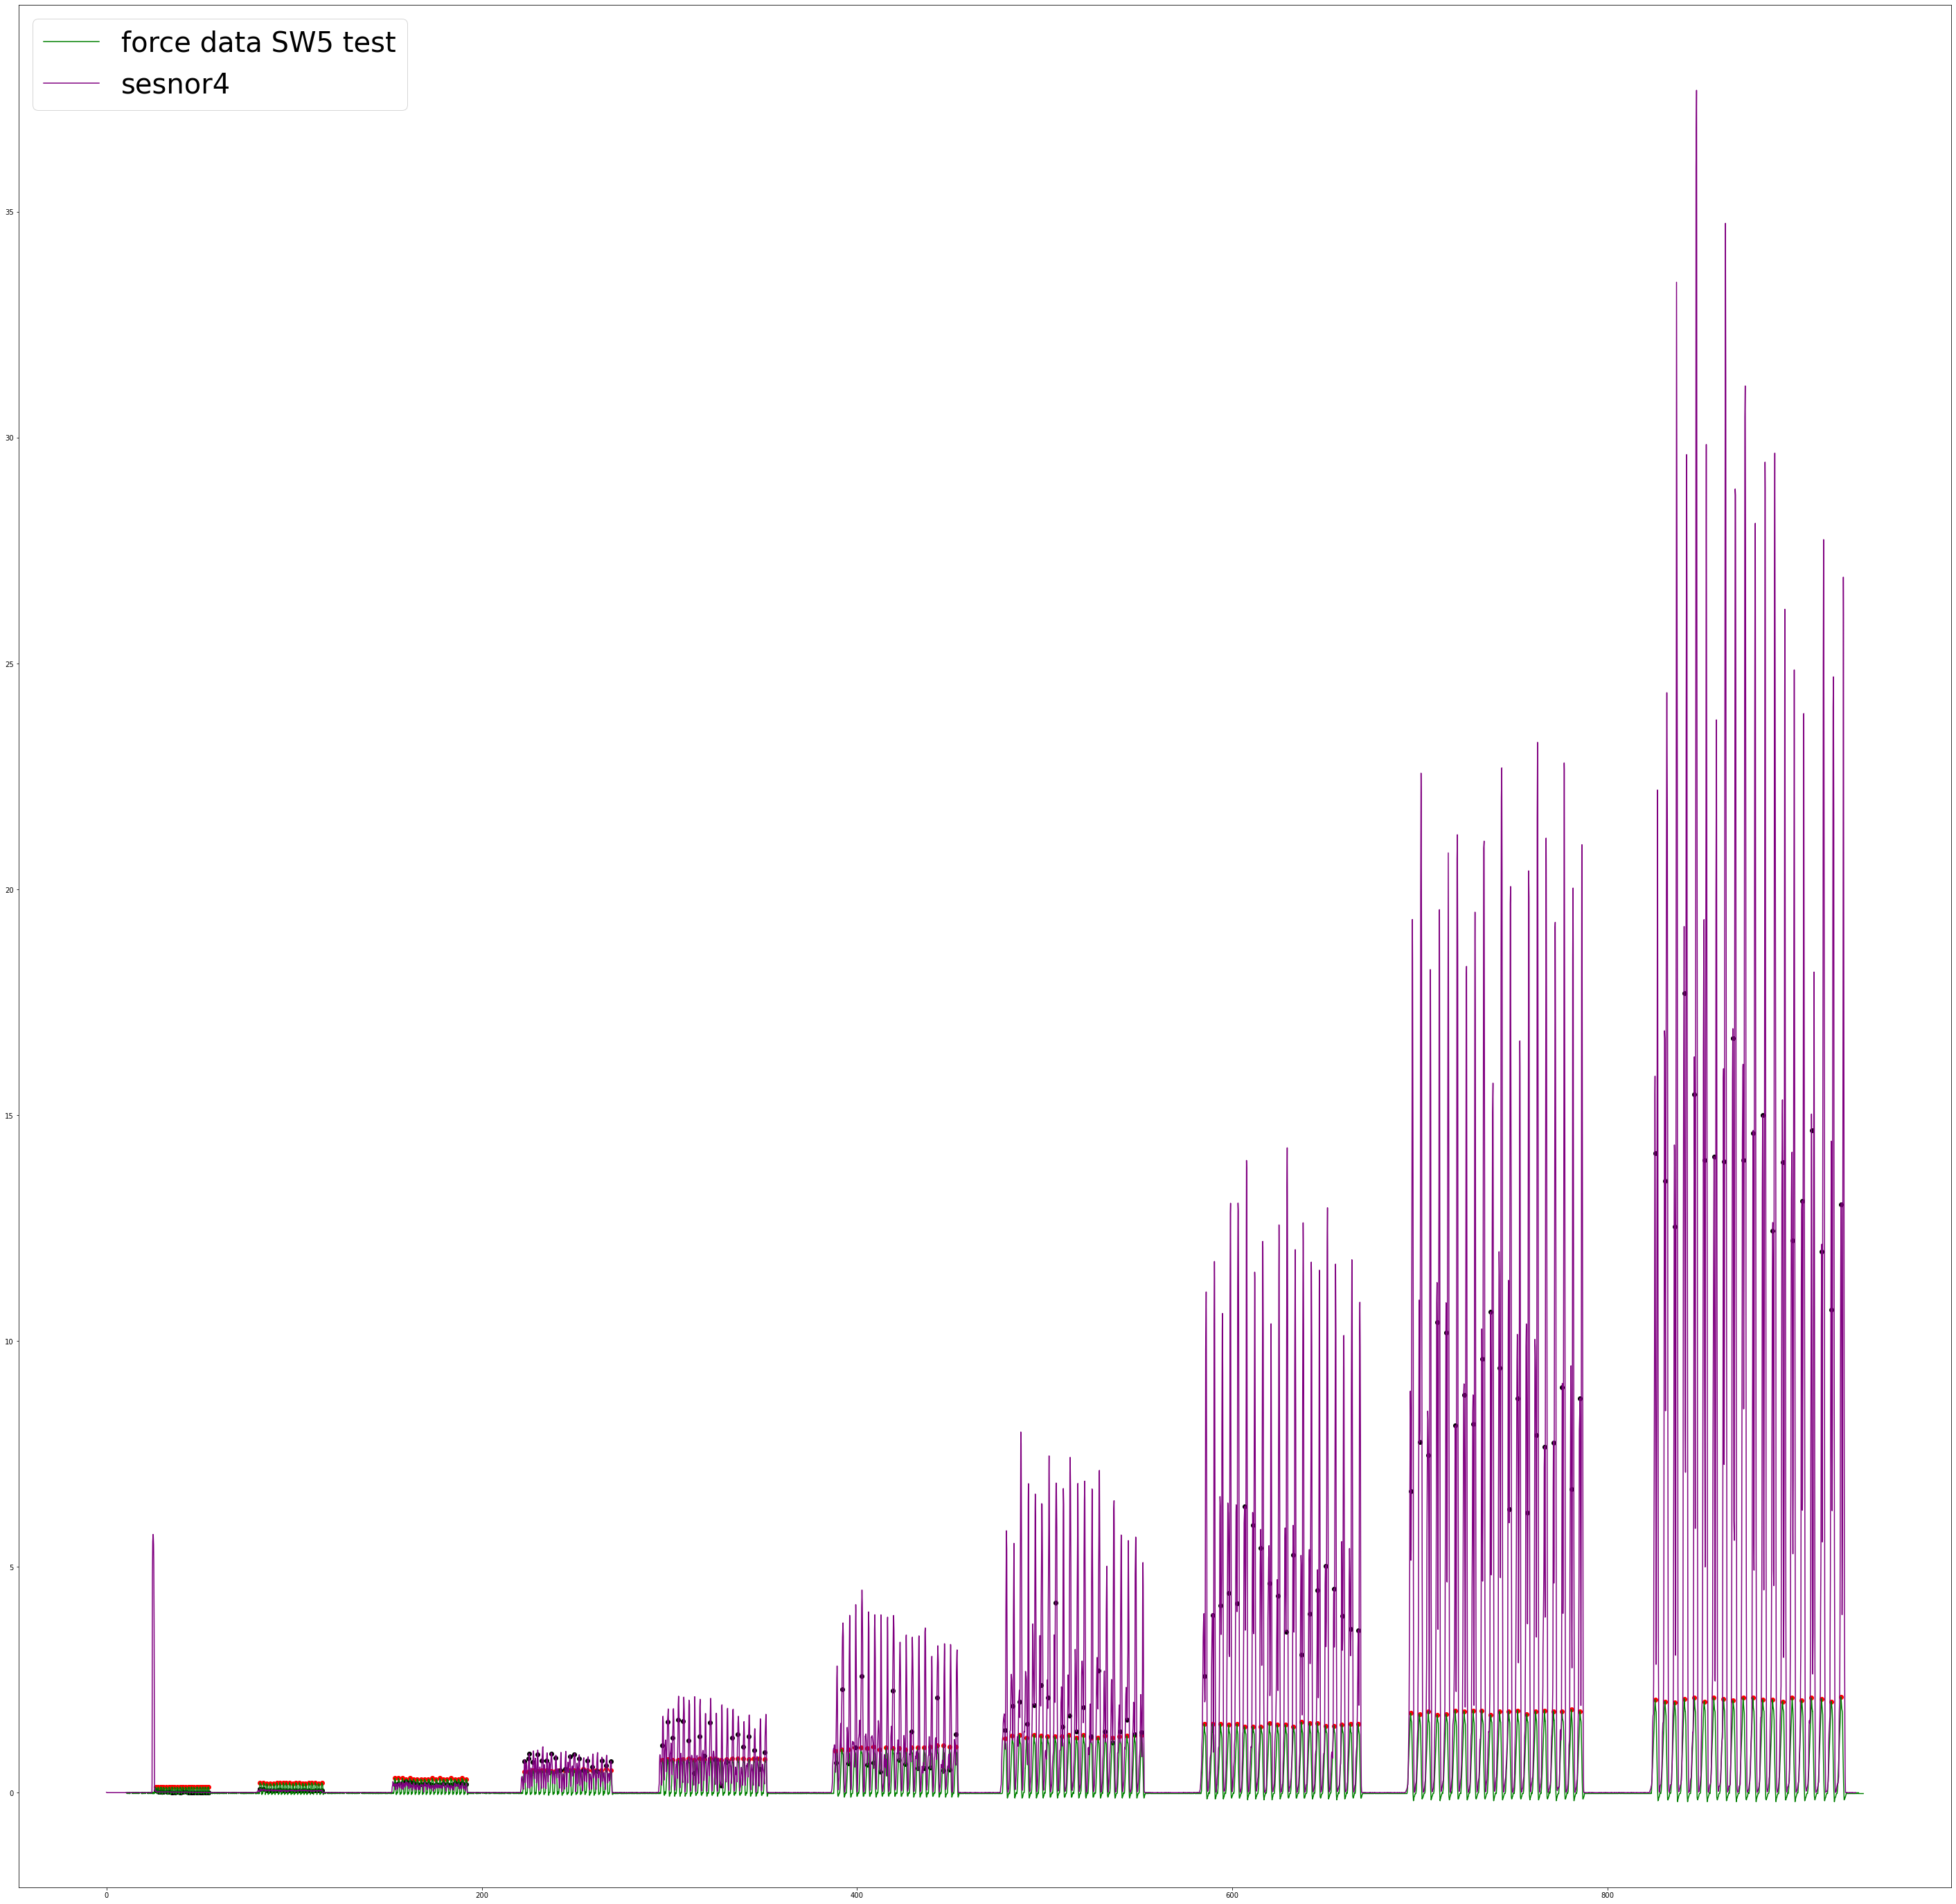

In [47]:
#visualizing and syncing the resistance data for each sensor SW 1- 5 - SW5

plt.figure(figsize=(50, 50))

# plt.plot(SW5["Unnamed: 0"],SW5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(SW5["Unnamed: 0"],SW5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(SW5["Unnamed: 0"],SW5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(SW5["Unnamed: 0"],SW5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_SW5 = x_force_SW5 + 10.5
scaled_SW5 = SW5["Unnamed: 0"]

plt.plot(scaled_x_force_SW5,Load_SW5,color = 'green', label = 'force data SW5 test' )
plt.plot(scaled_SW5,SW5["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for SW5")

#finding the peaks

pidx_Load_SW5, _ = find_peaks(Load_SW5,prominence= 0.1 )
peaks_Load_SW5 = Load_SW5[pidx_Load_SW5]
peaks_Ltime_SW5 = scaled_x_force_SW5[pidx_Load_SW5]

plt.scatter(peaks_Ltime_SW5,peaks_Load_SW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_SW5time = []

peaks_Ltime_SW5.reset_index(drop = True, inplace = True)
peaks_Load_SW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_SW5)):
    idx_SW5time.append(bisect.bisect_left(SW5["Unnamed: 0"], peaks_Ltime_SW5[i]))

plt.scatter(SW5["Unnamed: 0"][idx_SW5time],SW5["s4_d"][idx_SW5time],color = 'black')

In [48]:
#Storing the peaks into csv file - SW5
Load_SW5peaks =[]

for i in range(len(peaks_Load_SW5)):
    Load_SW5peaks.append(peaks_Load_SW5[i])
    
content_SW5 = {'R1':SW5["s1_d"][idx_SW5time],
              'R2':SW5["s2_d"][idx_SW5time],
              'R3':SW5["s3_d"][idx_SW5time],
              'R4':SW5["s4_d"][idx_SW5time], 
              'Load': Load_SW5peaks} 

df_SW5 = pd.DataFrame(content_SW5, columns = ['R1','R2','R3','R4','Load'])

df_SW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\SW5.csv',index = False, header = True)